# <font color = red> Tarea
![imagen.png](attachment:imagen.png)
Además use el método de estratificación donde se divide en B estratos, visto la clase pasada y compare el resultado con los métodos anteriores cuando se toman $2,4,6,10$ estratos respectivamente, concluya.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle  # Librería para hacer ciclos
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística
import pandas as pd

In [26]:
def fun(x):
    if x>=.5:
        return (2*x-1)**(1/3)
    else:
        return -(-2*x+1)**(1/3)
    
def fun_estratificado(B):
    U2 = np.random.rand(B)
    i = np.arange(0,B)
    v = (U2+i)/B
    return np.mean(list(map(lambda x:fun(x),v)))

In [51]:
N = 10
u1 = np.random.rand(N)
f_u1 = list(map(lambda x: fun(x),u1))
media_montecarlo = np.mean(f_u1)


u1 =np.random.uniform(0,.6,3)
u2 =np.random.uniform(.6,.9,3)
u3 =np.random.uniform(0.9,1,4)
u  = [u1,u2,u3]
m  = range(len(u))
w  = [.5,1,4]
xi = list(map(lambda y:list(map(lambda x:fun(x),y)),u))
muestras = list(map(lambda y:list(map(lambda wi,xi:xi/wi,w,y)),xi))
montecarlo_estratificado=np.concatenate(muestras).mean()


u2 = 1-u1
f_u2 = list(map(lambda x:fun(x),u2))
media_complementario = (np.mean(f_u2)+media_montecarlo)/2



T=[2,4,6,10]
e=list(map(lambda n:fun_estratificado(n),T))


0.04144142329313799

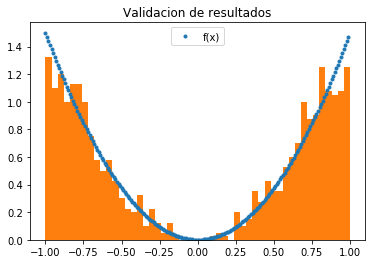

In [74]:
N = 1000
u1 = np.random.rand(N)
f_u1 = list(map(lambda x: fun(x),u1))
f=lambda x:3/2*x**2 if x>=-1 or x<=1 else 0
x=np.arange(-1,1,.01)
plt.plot(x,list(map(lambda x:f(x),x)),'.',label='f(x)')
plt.hist(f_u1,50,density=True)
plt.title('Validacion de resultados')
plt.legend()
plt.show()

In [68]:
df = pd.DataFrame(index=['Montecarlo crudo','Muestreo estratificado','Numeros complementarios','Estratificado B=2','Estratificado B=4','Estratificado B=6','Estratificado B=10'],columns=['Media estimada'], dtype='float')
df.iloc[0,0]=media_montecarlo
df.iloc[1,0]=montecarlo_estratificado
df.iloc[2,0]=media_complementario
df.iloc[3,0]=e[0]
df.iloc[4,0]=e[1]
df.iloc[5,0]=e[2]
df.iloc[6,0]=e[3]
df

,Media estimada
Montecarlo crudo,0.041441
Muestreo estratificado,0.311891
Numeros complementarios,-0.061062
Estratificado B=2,-0.043758
Estratificado B=4,-0.045977
Estratificado B=6,-0.039204
Estratificado B=10,0.034174
